# About KNN

The k-nearest-neighbors algorithm is a classification algorithm that takes a bunch of labelled points and uses them to learn how to label other points.
This algorithm classifies cases based on their similarity to other cases. In k-nearest neighbors, data points that are near each other are said to be “neighbors.”
K-nearest neighbors is based on this paradigm: “Similar cases with the same class labels are near each other.”
Thus, the distance between two cases is a measure of their dissimilarity.There are different ways to calculate the similarity, or conversely, the distance or
dissimilarity of two data points. For example, this can be done using Euclidean distance.Now, let’s see how the k-nearest neighbors algorithm actually works.
In a classification problem, the k-nearest neighbors algorithm works as follows:
    1. Pick a value for K.
    2. Calculate the distance from the new case (holdout from each of the cases in the dataset).
    3. Search for the K observations in the training data that are ‘nearest’ to the measurements of the unknown data point.
    4. predict the response of the unknown data point using the most popular response value from the K nearest neighbors.
There are two parts in this algorithm that might be a bit confusing.
******************************************************************************************************************

First, how to select the correct K; and second, how to compute the similarity between cases, for example, among customers?
Let’s first start with second concern, that is, how can we calculate the similarity between two data points? Assume that we have two customers, customer 1 and customer 2. And, for a moment, assume that these 2 customers have only one feature, Age.
We can easily use a specific type of Minkowski distance to calculate the distance of these 2 customers.

It is indeed, the Euclidian distance.
Distance of x1 from x2 is root of 34 minus 30 to power of 2, which is 4.What about if we have more than one feature, for example Age and Income? If we have income and age for each customer, we can still use the same formula, but this
time, we’re using it in a 2-dimensional space. We can also use the same distance matrix for multi-dimensional vectors.Of course, we have to normalize our feature set to get the accurate dissimilarity measure. There are other dissimilarity measures as well that can be used for this purpose but, as mentioned, it is highly dependent on data type and also the domain that classification
is done for it. As mentioned, K in k-nearest neighbors, is the number of nearest neighbors to examine.
It is supposed to be specified by the user. So, how do we choose the right K? Assume that we want to find the class of the customer noted as question mark on the chart. What happens if we choose a very low value of K, let’s say, k=1?
The first nearest point would be Blue, which is class 1.This would be a bad prediction, since more of the points around it are Magenta, or class 4. In fact, since its nearest neighbor is Blue, we can say that we captured the noise in the
data, or we chose one of the points that was an anomaly in the data. A low value of K causes a highly complex model as well, which might result in over-fitting of the model. It means the prediction process is not generalized enough to be used for out-of-sample cases. Out-of-sample data is data that is outside of the dataset used to train the model.
In other words, it cannot be trusted to be used for prediction of unknown samples. It’s important to remember that over-fitting is bad, as we want a general model that works for any data, not just the data used for training. Now, on the opposite side of the spectrum, if we choose a very high value of K, such as K=20, then the model becomes overly generalized.
So, how we can find the best value for K? The general solution is to reserve a part of your data for testing the accuracy of the
model. Once you’ve done so, choose k =1, and then use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set.Repeat this process, increasing the k, and see which k is best for your model. For example, in our case, k=4 will give us the best accuracy.Nearest neighbors analysis can also be used to compute values for a continuous target. In this situation, the average or median target value of the nearest neighbors is used to obtain the predicted value for the new case. For example, assume that you are predicting the price of a home based on its feature set, such as number of rooms, square footage, the year it was built, and so on. You can easily find the three nearest neighbor houses, of course -- not only based on distance, but also based on all the attributes, and then predict the price of the house, as the median of neighbors.

The telecommunication dataset is a classification problem aimed at segmenting its customers based on service usage patterns, categorizing the customer into four groups ie basic, e-service, plus service and total service. The dmographoc data will be used to predict group by customizing offers for individual prospective customers. The objective of this assignment is to build a classifier to predict the class of unknown cases. We will be using the KNN to analyze this dataset. 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [40]:
#Load the dataset
Cust= pd.read_csv("C:/Users/Public/Documents/TeleCustomer.csv")
Cust.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [41]:
Cust.tail()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
995,3,10,39,27,0,0,3,0,0,1,3,A
996,1,7,34,22,0,2,5,5,0,1,1,A
997,3,67,59,944,0,40,5,33,0,1,1,D
998,3,70,49,87,0,18,2,22,0,1,1,C
999,3,50,36,39,1,7,3,3,0,1,3,B


In [42]:
Cust.columns

Index(['region', 'tenure', 'age', 'income', 'marital', 'address', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [43]:
Cust.shape

(1000, 12)

In [44]:
Cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   1000 non-null   int64 
 1   tenure   1000 non-null   int64 
 2   age      1000 non-null   int64 
 3   income   1000 non-null   int64 
 4   marital  1000 non-null   int64 
 5   address  1000 non-null   int64 
 6   ed       1000 non-null   int64 
 7   employ   1000 non-null   int64 
 8   retire   1000 non-null   int64 
 9   gender   1000 non-null   int64 
 10  reside   1000 non-null   int64 
 11  custcat  1000 non-null   object
dtypes: int64(11), object(1)
memory usage: 93.9+ KB


In [45]:
Cust.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [46]:
Cust.describe(include='all')

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000,NaN
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793,NaN
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000,NaN
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000,NaN
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000,NaN


In [47]:
Cust.isnull()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False


In [48]:
Cust['custcat'].value_counts()

C    281
A    266
D    236
B    217
Name: custcat, dtype: int64

Text(0.5, 1.0, ' Income received against Counts')

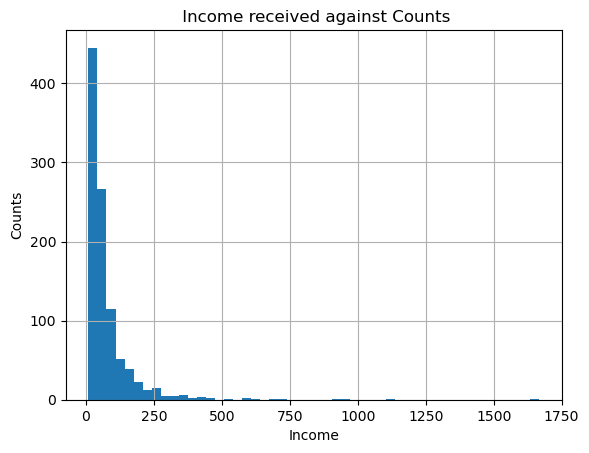

In [49]:
Cust.hist(column='income', bins=50)
plt.xlabel("Income")
plt.ylabel("Counts")
plt.title(" Income received against Counts")

#Feature set
Use the scikit-learn library to convert the panda dataframe to numpy array

In [50]:
X=Cust[['region','tenure','age','income','marital','address','ed','employ','retire','gender','reside']].values
X[0:5]

array([[  2,  13,  44,  64,   1,   9,   4,   5,   0,   0,   2],
       [  3,  11,  33, 136,   1,   7,   5,   5,   0,   0,   6],
       [  3,  68,  52, 116,   1,  24,   1,  29,   0,   1,   2],
       [  2,  33,  33,  33,   0,  12,   2,   0,   0,   1,   1],
       [  2,  23,  30,  30,   1,   9,   1,   2,   0,   0,   4]],
      dtype=int64)

In [51]:
y=Cust['custcat'].values
y[0:5]

array(['A', 'D', 'C', 'A', 'C'], dtype=object)

# Normalize the data.
Data standardization gives the data zero mean and a unit variance.This is ideal for KNN algorithms because of the distance data points


In [52]:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456, -0.12650641,  1.0100505 ,
        -0.25303431,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  0.54644972,  1.0100505 ,
        -0.4514148 ,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  0.35951747,  1.0100505 ,
         1.23481934, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.41625141, -0.9900495 ,
         0.04453642, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797, -0.44429125,  1.0100505 ,
        -0.25303431, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

# Train test split
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that has not been trained on. Doing a train and test on the same dataset will mosly likely have a low out of sample accuracy. Train/test split involves splitting the dataset into training and testing which are mutually exclusive.This will provide a more accurate evaluation on out of sample accuracy because the testing dataset is not part of the dataset that has been used to trained the model. 

In [53]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=4)
print("Train_set:", X_train.shape,y_train.shape)
print("Test_set:", x_test.shape, y_test.shape)

Train_set: (800, 11) (800,)
Test_set: (200, 11) (200,)


Classification K Nearest Neighbor

In [54]:
#import library
from sklearn.neighbors import KNeighborsClassifier

In [55]:
#Training
k=4
#Train the model and predict
neigh= KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

Predicting

 #We can use the model to make predictions on the test set

In [56]:
yhat= neigh.predict(x_test)
yhat[0:5]

array(['A', 'A', 'C', 'B', 'D'], dtype=object)

#Accuracy Evaluation
Accuracy classification score is a function that computes subset accuracy. This function is equal to jaccard_score function.

In [57]:
from sklearn import metrics
print("Train set Accuracy:", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy:", metrics.accuracy_score(y_test, yhat))

Train set Accuracy: 0.5475
Test set Accuracy: 0.32


In [58]:
#Calculate the accuracy of KNN for different values of K

In [60]:
ks=10
mean_acc= np.zeros((ks-1))
std_acc= np.zeros((ks-1))

for n in range (1,ks):
    #Train and predict
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat= neigh.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, yhat)

std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

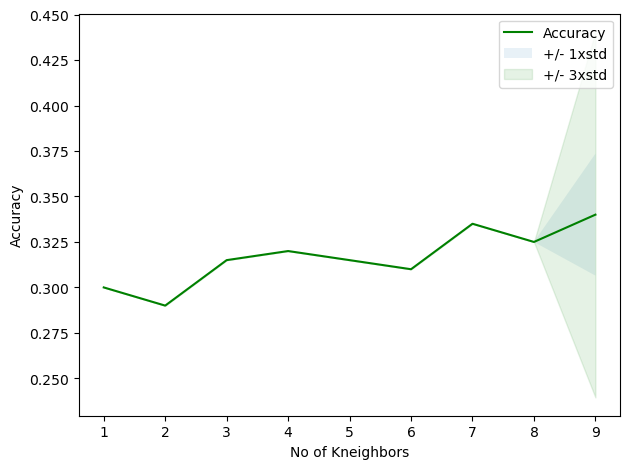

In [69]:
#Plot the Model Accuracy for a different number of neighbors
plt.plot(range(1,ks), mean_acc,'g')
plt.fill_between(range(1,ks), mean_acc- 1 *std_acc, mean_acc + 1 *std_acc, alpha=0.10)
plt.fill_between(range(1,ks), mean_acc- 3 *std_acc, mean_acc + 3 *std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy','+/- 1xstd', '+/- 3xstd'))
plt.xlabel('No of Kneighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

In [70]:
print('The best accuracy was with', mean_acc.max(),'with k=',mean_acc.argmax()+1)

The best accuracy was with 0.34 with_k= 9
